# Notebook to generate qualifying language plot

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [45]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

prop = fm.FontProperties(fname='../../../font/cmunrm.ttf')

### Data

In [11]:
mean_similarity_df = pd.read_pickle("../../data/similarity_df_mean.pkl")

### Heatmap

                  likely  probably  possibly     maybe
racially        0.524229  0.847555  0.905465  0.860164
racist          0.291153  0.625516  0.691515  0.811148
racism          0.119155  0.332674  0.447579  0.448843
discrimination  0.304215  0.384871  0.487112  0.431277


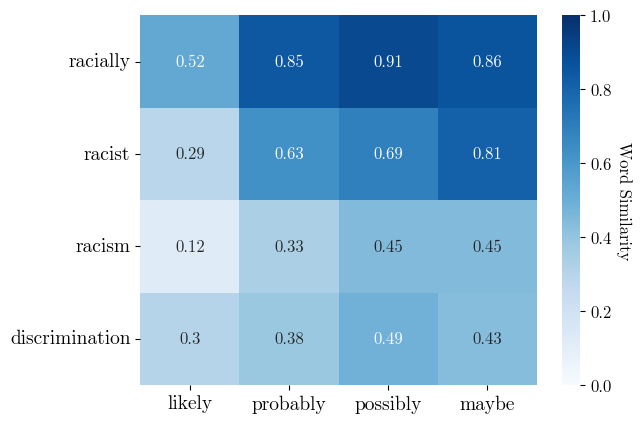

In [50]:
lst_interest = ["likely", "probably", "possibly", "maybe"]
print(mean_similarity_df.loc[["racially", "racist", "racism", "discrimination"], lst_interest])


color_intervals = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
heat = sns.heatmap(mean_similarity_df.loc[["racially", "racist", "racism", "discrimination"], lst_interest], 
            annot=True, cmap="Blues", cbar_kws={'ticks': color_intervals, 'label': 'Word Similarity'},
            vmin=0, vmax=1);

cbar = heat.collections[0].colorbar
cbar.ax.set_ylabel('Word Similarity', rotation=270, labelpad=15, 
                   #rotation=90,
                   fontproperties=prop)
for tick in cbar.ax.yaxis.get_ticklabels():
    tick.set_fontproperties(prop)

for text in heat.texts:
    text.set_fontproperties(prop)

# plt.title('Qualifying language similarity', fontproperties=prop, size=BIGGER_SIZE)
# plt.xlabel('year', fontproperties=prop, size=MEDIUM_SIZE)
# plt.ylabel('count', fontproperties=prop, size=MEDIUM_SIZE)
plt.xticks(fontproperties=prop, size=SMALL_SIZE)
plt.yticks(fontproperties=prop, size=SMALL_SIZE);

plt.savefig('../../results/figures/racism_language_qualifier.png', 
            bbox_inches='tight')